+---------+----------+-------------+----------+-------------+----------+---------------------------+
|    i    |    Xl    |    f(Xl)    |    Xu    |    f(Xu)    |    Xr    |    f(Xr)    |    Ea(%)    |
+---------+----------+-------------+----------+-------------+----------+---------------------------+
| 0       | -1.0000  | -11.5000    | 0.0000   | 2.0000      | -0.1481  | 0.5178      | N/A         |
| 1       | -1.0000  | -11.5000    | -0.1481  | 0.5178      | -0.1848  | 0.1497      | 19.85       |
| 2       | -1.0000  | -11.5000    | -0.1848  | 0.1497      | -0.1953  | 0.0445      | 5.36        |
| 3       | -1.0000  | -11.5000    | -0.1953  | 0.0445      | -0.1984  | 0.0133      | 1.56        |
+---------+----------+-------------+----------+-------------+----------+---------------------------+
Root Nearly Found at Ea = 1.56%
Final Estimated Root: -0.1984


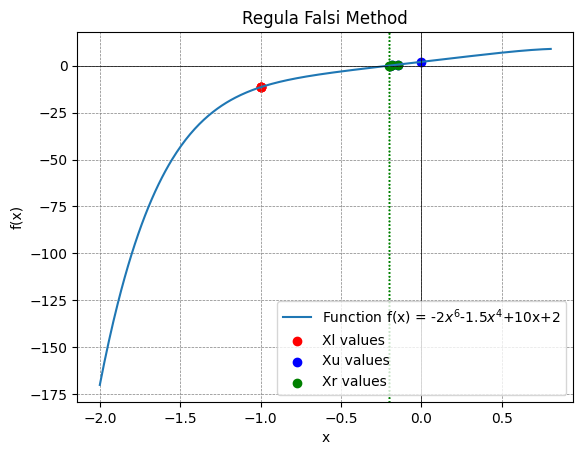

In [1]:
import matplotlib.pyplot as plt
import numpy as np

xl = float(input("Enter Lower Limit\nXl: "))
xu = float(input("Enter Upper Limit\nXu: "))

def f(x):
    return -2 * x**6 - 1.5 * x**4 + 10 * x + 2


# Intializes the variables of the method.
xl_values = []
xu_values = []
xr_values = []
xr_old = 0
i = 0

# Prints out the results with the calculations.
print("+---------+----------+-------------+----------+-------------+----------+---------------------------+")
print("|    \033[2;3mi\033[0m    |    \033[2;3mXl\033[0m    |    \033[2;3mf(Xl)\033[0m    |    \033[2;3mXu\033[0m    "
    "|    \033[2;3mf(Xu)\033[0m    |    \033[2;3mXr\033[0m    |    \033[2;3mf(Xr)\033[0m    |    \033[2;3mEa(%)\033[0m    |")
print("+---------+----------+-------------+----------+-------------+----------+---------------------------+")

while True:
    fxl = f(xl)
    fxu = f(xu)
    xr = ((xl * fxu) - (xu * fxl)) / (fxu - fxl)
    fxr = f(xr)
    width = 8

    if i == 0:
        ea = "No Error Defined."
    else:
        ea = abs((xr - xr_old) / xr) * 100


    if ea == 'No Error Defined.':
        print(f"| {i:<{width}}| {xl:<{width}.4f} | {fxl:<{width}.4f}    | {xu:<{width}.4f} | {fxu:<{width}.4f}    "
            f"| {xr:<{width}.4f} | {fxr:<{width}.4f}    | N/A         |")
    else:
        print(f"| {i:<{width}}| {xl:<{width}.4f} | {fxl:<{width}.4f}    | {xu:<{width}.4f} | {fxu:<{width}.4f}    "
            f"| {xr:<{width}.4f} | {fxr:<{width}.4f}    | \033[2;3m{ea: <{width}.2f}\033[0m    |")

    xl_values.append(xl)
    xu_values.append(xu)
    xr_values.append(xr)

    if ea != 'No Error Defined.' and ea < 2:
        print("+---------+----------+-------------+----------+-------------+----------+---------------------------+")
        print(f"Root Nearly Found at Ea = \033[1;3m{ea:.2f}%\033[0m")
        break
    if fxl * fxr < 0:
        xu = xr
    else:
        xl = xr

    xr_old = xr
    i += 1

print(f"Final Estimated Root: \033[1;3m{xr: .4f}\033[0m")

x = np.linspace(xl - 1, xu + 1, 400)
y = f(x)

# Plots the method itself.
plt.gcf().canvas.manager.set_window_title("Regula Falsi Method | Function Plot")
plt.plot(x, y, label='Function f(x) = -$2x^6$-$1.5x^4$+10x+2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.scatter(xl_values, [f(val) for val in xl_values], color='red', label='Xl values')
plt.scatter(xu_values, [f(val) for val in xu_values], color='blue', label='Xu values')
plt.scatter(xr_values, [f(val) for val in xr_values], color='green', label='Xr values')

# Highlights the roots.
for xr_val in xr_values:
    plt.axvline(x=xr, color='green', linestyle=':', linewidth=1)

# Adds titles, labels, legends, and window title.
plt.legend()
plt.title('Regula Falsi Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()